In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

tickers =["MDB","AAPL","TSLA"]

start_date = '2019-01-01'
end_date = '2020-12-31'
df = data.DataReader(tickers, data_source='yahoo', start=start_date, end=end_date)
df.head(5)

Attributes  Adj Close                            Close                        \
Symbols           MDB       AAPL       TSLA        MDB       AAPL       TSLA   
Date                                                                           
2019-01-02  79.949997  38.562561  62.023998  79.949997  39.480000  62.023998   
2019-01-03  75.889999  34.721451  60.071999  75.889999  35.547501  60.071999   
2019-01-04  81.730003  36.203678  63.537998  81.730003  37.064999  63.537998   
2019-01-07  85.699997  36.123104  66.991997  85.699997  36.982498  66.991997   
2019-01-08  89.989998  36.811718  67.070000  89.989998  37.687500  67.070000   

Attributes       High                              Low                        \
Symbols           MDB       AAPL       TSLA        MDB       AAPL       TSLA   
Date                                                                           
2019-01-02  82.580002  39.712502  63.026001  78.110001  38.557499  59.759998   
2019-01-03  79.500000  36.430000  61.880001  75.000000  35.500000  59.476002   
2019-01-04  83.889999  37.137501  63.599998  77.294998  35.950001  60.546001   
2019-01-07  89.199997  37.207500  67.348000  82.750000  36.474998  63.549999   
2019-01-08  90.589996  37.955002  68.802002  85.080002  37.130001  65.403999   

Attributes       Open                           Volume               \
Symbols           MDB       AAPL       TSLA        MDB         AAPL   
Date                                                                  
2019-01-02  81.400002  38.722500  61.220001  1325100.0  148158800.0   
2019-01-03  77.699997  35.994999  61.400002  1157800.0  365248800.0   
2019-01-04  77.849998  36.132500  61.200001  1214700.0  234428400.0   
2019-01-07  83.050003  37.174999  64.344002  1158900.0  219111200.0   
2019-01-08  88.000000  37.389999  68.391998  1414200.0  164101200.0   

Attributes              
Symbols           TSLA  
Date                    
2019-01-02  58293000.0  
2019-01-03  34826000.0  
2019-01-04  36970500.0  
2019-01-07  37756000.0  
2019-01-08  35042500.0

In [3]:
close = df['Close']

In [5]:
close


Symbols,MDB,AAPL,TSLA
Date,,,
2019-01-02,79.949997,39.480000,62.023998
2019-01-03,75.889999,35.547501,60.071999
2019-01-04,81.730003,37.064999,63.537998
2019-01-07,85.699997,36.982498,66.991997
2019-01-08,89.989998,37.687500,67.070000
...,...,...,...
2020-12-24,378.480011,131.970001,661.770020
2020-12-28,363.079987,136.690002,663.690002
2020-12-29,363.859985,134.869995,665.989990


In [6]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [7]:
all_weekdays


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=523, freq='B')

In [8]:
close = close.reindex(all_weekdays)

In [12]:
close.head (9)

Symbols,MDB,AAPL,TSLA
2019-01-01,NaN,NaN,NaN
2019-01-02,79.949997,39.480000,62.023998
2019-01-03,75.889999,35.547501,60.071999
2019-01-04,81.730003,37.064999,63.537998
2019-01-07,85.699997,36.982498,66.991997
2019-01-08,89.989998,37.687500,67.070000
2019-01-09,86.620003,38.327499,67.706001
2019-01-10,75.199997,38.450001,68.994003
2019-01-11,74.480003,38.072498,69.452003


In [13]:
close = close.fillna(method='ffill')

In [18]:
close.head(9)


Symbols,MDB,AAPL,TSLA
2019-01-01,NaN,NaN,NaN
2019-01-02,79.949997,39.480000,62.023998
2019-01-03,75.889999,35.547501,60.071999
2019-01-04,81.730003,37.064999,63.537998
2019-01-07,85.699997,36.982498,66.991997
2019-01-08,89.989998,37.687500,67.070000
2019-01-09,86.620003,38.327499,67.706001
2019-01-10,75.199997,38.450001,68.994003
2019-01-11,74.480003,38.072498,69.452003


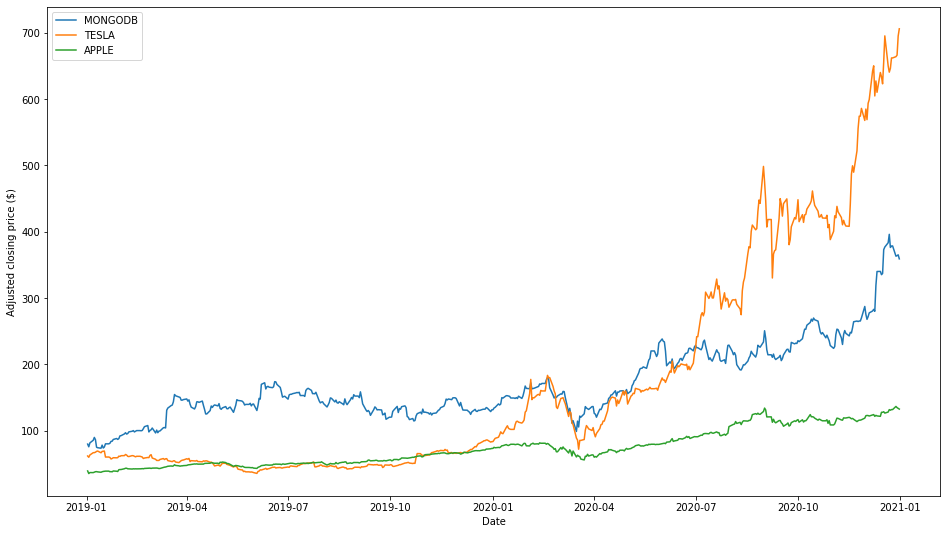

In [30]:
# Get the Variou stks timeseries. This now returns a Pandas Series object indexed by date.
MDBD = close.loc[:, 'MDB']
TES = close.loc[:, 'TSLA']
APPLE = close.loc[:, 'AAPL']

# this is additional and not part of the line graph
#Calculate the 20 and 100 days moving averages of the closing prices
#short_rolling_MDBD = MDBD.rolling(window=20).mean()
#long_rolling_MDBD = MDBD.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(MDBD.index, MDBD, label='MONGODB')
ax.plot(TES.index, TES, label='TESLA')
ax.plot(APPLE.index, APPLE, label='APPLE')
#ax.plot(short_rolling_MDBD.index, short_rolling_MDBD, label='20 days rolling')
#ax.plot(long_rolling_MDBD.index, long_rolling_MDBD, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()